In [1]:
import vaccontrib as vc
import numpy as np
from numpyarray_to_latex.jupyter import to_jup
from numpyarray_to_latex import to_ltx
import matplotlib.pyplot as pl

## Next generation matrix

Consider $M$ coupled populations, individuals of which produce new individuals in each of these populations. A next generation matrix 
$K_{ij}$ of shape $M\times M$ contains the average offspring a single $j$ individual produces in population $i$. 

For instance, the matrix

In [2]:
K = np.array([[1.,1.],[2.,3.]])
to_jup(K,fmt='{:1.0f}',prefix='K=')

<IPython.core.display.Math object>

describes a system of two populations, let's call them $A$ and $B$ with indices $i_A=0$ and $i_B=1$. In one generation (i.e. during its lifetime), a single $A$ individual produces, on average, $K_{00}=1$ individuals in population $A$ and $K_{10}=2$ individuals in population $B$. A single $B$ individual produces, on average, $K_{11}=3$ individuals in population $A$ and $K_{01}=1$ individuals in population $A$.

Let the vector $y(g)$ of length $M$ contain the number of $A$- and $B$-individuals, respectively. The per-generation dynamics follow

$$
y(g+1) = K\cdot y(g).
$$

After a few generations, the system state $y$ approaches the eigenvector of $K$ that corresponds to its largest eigenvalue (spectral radius). We can compute the relative size of populations $A$ and $B$ as

In [3]:
R, y = vc.linalg.get_spectral_radius_and_eigenvector(K)
to_jup(y,
       is_row_vector=False,
       prefix=r'y=\left(\begin{matrix}A\\B\end{matrix}\right)=')

<IPython.core.display.Math object>

## Contribution matrix
Now, we want to define the so-called "contribution matrix" which quantifies the absolute contributions of each population to the reproduction of each respective population when the exponential growth (or decay) has approached the eigenstate.

Operationally, one can define the contribution matrix as follows. During a time of growth (decay), we track newborn individuals of both populations $A$ and $B$ for a few generations. Let's call the set of these individuals $\mathcal{I}$. For each individual $i\in\mathcal I$, we track the count of its offspring in the respective populations $A$ and $B$. Let's define as 
$$
\underline A(i) = \begin{cases}
                    1 & \mathrm{if\ }i\mathrm{\ belonged\ to\ }A,\\
                    0 & \mathrm{otherwise}\\
                  \end{cases}
$$
and
$$
\underline B(i) = \begin{cases}
                    1 & \mathrm{if\ }i\mathrm{\ belonged\ to\ }B,\\
                    0 & \mathrm{otherwise}\\
                  \end{cases}
$$
functions that give information about the populations individuals $i\in\mathcal I$ belonged to. Hence, $\mathcal I_A = \{i: i\in \mathcal I \wedge \underline A(i)=1\}$ and $\mathcal I_B = \{i:i \in \mathcal I \wedge \underline B(i)=1\}$ are the respective subsets of $\mathcal I$ that contain $A$ and $B$ individuals, respectively.

We further define as $\sigma_{p}(i)$ the number of $p$-offspring that individual $i$ produced during its lifetime. Then we can define the offspring matrix

$$
P = \sum_{i\in\mathcal I}
    \left(\begin{matrix}
                \sigma_{A}(i)\underline A(i) & \sigma_{A}(i)\underline B(i)\\
                \sigma_{B}(i)\underline A(i) & \sigma_{B}(i)\underline B(i)
          \end{matrix}
    \right)
$$

whose entries $P_{ij}$ quantify how much $i$-offspring has been produced by $j$-individuals during the measurement period. Given the definitions of the sets above, we can also write $P$ as 

$$
P = 
    \left(\begin{matrix}
                \sum_{i\in I_A}\sigma_{A}(i) & \sum_{i\in I_B}\sigma_{A}(i)\\
                \sum_{i\in I_A}\sigma_{B}(i) & \sum_{i\in I_B}\sigma_{B}(i)
          \end{matrix}
    \right).
$$



The relative contribution matrix is then defined as

$$
\tilde C = \frac{P}{\sum_{i\in\mathcal I} \big(\sigma_A(i)+\sigma_B(i)\big)}.
$$

Each entry $\tilde C_{ij}$ contains the $j$-produced number of $i$-offspring relative to the total number of offspring in the system during the measurement period.

The average number of offspring per any individual is given as 

$$
R = \frac{1}{|\mathcal I|}\sum_{i\in\mathcal I} \Big(\sigma_A(i)+\sigma_B(i)\Big).
$$

This number is also called the "basic reproduction number" because it quantifies the average number of offspring per "typical" individual. So in order to find the absolute contributions of $j$-induced $i$-offspring to the reproduction number we define the contribution matrix

$$
C = R\tilde C,
$$

which evaluates to

$$
C = \frac{1}{|\mathcal I|}      \left(\begin{matrix}
                \sum_{i\in I_A}\sigma_{A}(i) & \sum_{i\in I_B}\sigma_{A}(i)\\
                \sum_{i\in I_A}\sigma_{B}(i) & \sum_{i\in I_B}\sigma_{B}(i)
          \end{matrix}
    \right)
$$

We can also define the next generation matrix operationally.

First, be reminded that $\mathcal I_A$ and $\mathcal I_B$ are the respective subsets of $\mathcal I$ that contain $A$ and $B$ individuals, respectively.
Then 
$$
y = \frac{1}{|\mathcal I|}\left(\begin{matrix} |\mathcal I_A|\\ |\mathcal I_B|\end{matrix}\right)
$$
describes the state of the system. To find $K$ we want to obtain the average number of $i$-offspring per active $j$ individual, i.e.

$$
K = 
    \left(\begin{matrix}
     \frac{1}{|\mathcal I_A|}\sum_{i\in I_A}\sigma_{A}(i) & 
     \frac{1}{|\mathcal I_B|}\sum_{i\in I_B}\sigma_{A}(i) \\
     \frac{1}{|\mathcal I_A|}\sum_{i\in I_A}\sigma_{B}(i) & 
     \frac{1}{|\mathcal I_B|}\sum_{i\in I_B}\sigma_{B}(i) \\
          \end{matrix}
    \right)
$$ 

We then see that

$$
K\cdot\mathrm{diag}(y) = 
     \left(\begin{matrix}
     \frac{1}{|\mathcal I|}\sum_{i\in I_A}\sigma_{A}(i) & 
     \frac{1}{|\mathcal I|}\sum_{i\in I_B}\sigma_{A}(i) \\
     \frac{1}{|\mathcal I|}\sum_{i\in I_A}\sigma_{B}(i) & 
     \frac{1}{|\mathcal I|}\sum_{i\in I_B}\sigma_{B}(i) \\
          \end{matrix}
    \right)
$$

$$
 = \frac{1}{|\mathcal I|}\left(\begin{matrix}
     \sum_{i\in I_A}\sigma_{A}(i) & 
     \sum_{i\in I_B}\sigma_{A}(i) \\
     \sum_{i\in I_A}\sigma_{B}(i) & 
     \sum_{i\in I_B}\sigma_{B}(i) \\
          \end{matrix}
    \right)
$$

so

$$
K\cdot\mathrm{diag}(y) = C.
$$

Note that the difference between $K$ and $C$ is subtle but important: While $K_{ij}$ contains the average number of $i$-offspring by a single $j$-individual, $C_{ij}$ quantifies the average number of $j$-caused $i$-offspring per individual, i.e. makes the important distinction to consider the relative amount of $j$-individuals in $\mathcal I$.

For our toy model, we can therefore easily quantify the contribution matrix by computing the eigenvector of the next generation matrix and plugging it into the equation above.

In [4]:
C = vc.get_2d_contribution_matrix(K)
to_jup(C,prefix='C=',mark_elements=[(1,1)])

<IPython.core.display.Math object>

Here we see that by far the largest contribution to the reproduction number is by $B$ individuals that produce other $B$ individuals.

Note that this does not necessarily mean that, if we wanted to stifle growth altogether to induce decay, it would be enough to hinder $B$-individuals from reproducing. Let's say that we somehow manage to stop $B$-individuals from reproducing altogether, such that only $A$-individuals can produce offspring (either $A$ or $B$). This means that the next generation matrix is modified as 

In [5]:
K_ = K.copy()
K_[:,1] = 0
to_jup(K_,fmt='{:1.0f}',prefix='K^*=')

<IPython.core.display.Math object>

which means that the contribution matrix changes to

In [6]:
C_ = vc.get_2d_contribution_matrix(K_)
to_jup(C_,fmt='{:4.2f}',prefix='C^*=')

<IPython.core.display.Math object>

with $R=1$. So the population will stay constant over time. Note that the respective contributions by population $A$ in $C^*$ are now of greater value than those in $C$.

## Epidemic spreading and vaccines

Regarding infectious disease dynamics, the next generation matrix $K_{mn}$ of small domain quantifies the production of infecteds in state $m$ by induced by a single infected in state $n$ around a certain system state, usually the disease-free state. Here, $m$ and $n$ can be states that combine multiple individual properties, for instance place of living, age, and vaccination status. In the following we will concentrate on combined states of age and vaccination status.

Let's begin with a toy model of $M=2$ age groups (say, "young" and "old") and $V=2$ vaccination states ("unvaccinated" and "vaccinated"), with $N_0=1000$ younger and $N_1=2000$ older people.


In [7]:
population_sizes = np.array([1000,2000])
to_jup(population_sizes,fmt='{:4.0f}',prefix='N=',is_row_vector=False)

<IPython.core.display.Math object>

These populations mainly contact individuals from their own population, but mix a bit as well. We can quantify that using a contact matrix

In [8]:
contact_matrix = np.array([[1.00,0.50],
                           [0.25,1.00]])
to_jup(contact_matrix,fmt='{:4.2f}',prefix=r'\gamma=')

<IPython.core.display.Math object>

The entry $\gamma_{ij}$ contains the average number of contacts per day a randomly chosen individual from population $j$ has with individuals of population $i$.

We now assume that 10% of the older population is vaccinated and 70% of the younger population is vaccinated.

In [9]:
disease_free_state = np.array([[ 300, 700],
                               [1800, 200]])
to_jup(disease_free_state,fmt='{:4.0f}',prefix=r'S=')

<IPython.core.display.Math object>

Note that $S$ is a matrix of shape $(M \times V)$, i.e. the element $S_{iv}$ counts the number of people in population $i$ that have vaccination status $v$.

We further define vaccine efficacy with the reduced relative probability $s_{iv}$ that an individual of population $i$ and vaccination status $v$ can be infected and assume that in the younger population, the vaccine has an efficacy of 60% and in the older population an efficacy of 50%. By definition, unvaccinated individuals do not experience a susceptibility reduction, which is why $s_{i0} = 0$.

In [10]:
susceptibility_reduction = np.array([[0., 0.6],
                                     [0., 0.5]])
to_jup(susceptibility_reduction,fmt='{:4.1f}',prefix=r's=')

<IPython.core.display.Math object>

Similarly, we can assume that vaccinated individuals that do become infected (i.e. suffer a breakthrough infection) have a reduced shedding rate, i.e. a transmissibility reduction $r_{iv}$. For vaccinated younger individuals we set $r = 0.2$ and for vaccinated older individuals we set $r = 0.3$. By definition, unvaccinated individuals do not experience a transmissibility reduction, which is why $r_{i0} = 0$.

In [11]:
transmissibility_reduction = np.array([[0., 0.2],
                                       [0., 0.3]])
to_jup(transmissibility_reduction,fmt='{:4.1f}',prefix=r'r=')

<IPython.core.display.Math object>

Let's say that younger individuals are not as affected by the disease as older ones and hence have a reduced viral shedding rate as compared to older individuals, which is why we set a base relative infection rate of $a_{0v} = 0.5$ and $a_{1v} = 1$.

In [12]:
relative_infection_rate = np.array([[0.5, 0.5],
                                    [1.0, 1.0]])
to_jup(relative_infection_rate,fmt='{:4.1f}',prefix=r'a=')

<IPython.core.display.Math object>

Last but not least, we assume that breakthrough infections are not as severe such that the average infectious period is two thirds of the original infectious period.

In [13]:
relative_recovery_rate = np.array([[1.0, 1.5],
                                   [1.0, 1.5]])
to_jup(relative_recovery_rate,fmt='{:4.1f}',prefix=r'b=')

<IPython.core.display.Math object>

With these definitions, the next generation matrix is defined as 

$$
K_{ijvw} = \frac{R_0}{\rho(K_0)}\gamma_{ij}(1-s_{iv})(1-r_{jw})\frac{S_{iv}a_{jw}}{N_j b_{jw}}.
$$

with the vaccine-free next generation matrix

$$
K_{0,ij} = \gamma_{ij}\frac{N_{i}a_{j0}}{N_j b_{j0}}.
$$

and the spectral radius $\rho(\cdot)$. We can compute $K$ using


In [14]:
K = vc.get_next_generation_matrix_from_matrices(
    R0=4.,
    gamma=contact_matrix,
    N=population_sizes,
    S=disease_free_state,
    s=susceptibility_reduction,
    r=transmissibility_reduction,
    a=relative_infection_rate,
    b=relative_recovery_rate,
)

$K$ is a 4-dimensional matrix of shape (M, M, V, V).

In [15]:
K.shape

(2, 2, 2, 2)

In order to display the matrix, we convert $K$ to a 2-dimensional block matrix

In [16]:
from vaccontrib.linalg import (
    convert_2d_block_to_4d_matrix,
    convert_4d_matrix_to_2d_block,
)
K_2d = convert_4d_matrix_to_2d_block(K)
to_jup(K_2d,separate_columns=[2],separate_rows=[2],prefix='K=')

<IPython.core.display.Math object>

Let's compute and display the full contribution matrix.

In [17]:
C = vc.get_contribution_matrix(K)

In [18]:
C_2d = convert_4d_matrix_to_2d_block(C)
to_jup(C_2d,separate_columns=[2],separate_rows=[2],prefix='C=')

<IPython.core.display.Math object>

We see that the major contribution to the basic reproduction number comes from unvaccinated older people that infect other unvaccinated older people.

In [19]:
to_jup(C_2d,separate_columns=[2],separate_rows=[2],mark_elements=[(2,2)],prefix='C=')

<IPython.core.display.Math object>

We can further compress the information in this matrix by summing over populations to obtain a $2\times2$-matrix that gives the contributions of vaccinated and unvaccinated people, respectively

In [20]:
C_reduced = vc.main.get_reduced_vaccinated_susceptible_contribution_matrix(K)

In [21]:
to_jup(C_reduced,fmt='{:6.2f}',mark_elements=[(1,1)],prefix=r'C^{SV}=')

<IPython.core.display.Math object>

## Shielding entire populations

In the following we investigate how contributions can change when populations are shielded from the infection process. Let's assume that unvaccinated people are shielded from the infection process entirely by "lockdown" rules that only affect unvaccinated people, i.e. we set $s_{i0}=1$ and $r_{i0}=1$. Note that this is an extreme, toy-model scenario that is used here for the sole purpose of illustrating the math.

In [22]:
susceptibility_reduction_lockdown_unvacc = susceptibility_reduction.copy()
transmissibility_reduction_lockdown_unvacc = transmissibility_reduction.copy()
susceptibility_reduction_lockdown_unvacc[:,0] = 1
transmissibility_reduction_lockdown_unvacc[:,0] = 1

In [23]:
K_lockdown_unvacc = vc.get_next_generation_matrix_from_matrices(
    R0=4.,
    gamma=contact_matrix,
    N=population_sizes,
    S=disease_free_state,
    s=susceptibility_reduction_lockdown_unvacc,
    r=transmissibility_reduction_lockdown_unvacc,
    a=relative_infection_rate,
    b=relative_recovery_rate,
)
to_jup(convert_4d_matrix_to_2d_block(K_lockdown_unvacc),separate_columns=[1],separate_rows=[1],prefix='K^*=')

<IPython.core.display.Math object>

Rows and columns that quantify offspring by unvaccinated people are now equal to zero. Let's look at the respective contributions.

In [24]:
C_lockdown_unvacc = vc.main.get_contribution_matrix(K_lockdown_unvacc)
C_reduced_lockdown_unvacc = vc.main.get_reduced_vaccinated_susceptible_contribution_matrix(K_lockdown_unvacc)

In [25]:
to_jup(C_reduced_lockdown_unvacc,fmt='{:6.2f}',mark_elements=[(1,1)],prefix='C^{*SV}=')

<IPython.core.display.Math object>

Comparing the contributions of vaccinated individuals pre- and after-lockdown, we see that the contributions skyrocketed by a factor 100. This is, however, not surprising. Since breakthrough infections can happen and only other vaccinated individuals can become infected, vaccinated-to-vaccinated infections now dominate the dynamics. Yet, in total, the process is subcritical with a total effective reproduction number of $R=0.28$.

## Testing the theoretical considerations with simulations

`vaccontrib` comes with a simulation module to simulate an $n$-dimensional linearly-coupled reproduction system (i.e. producing either exponential growth or decay, respectively). In the following, we will use the 2d-next generation matrix from our vaccine toy-model to demonstrate that the contribution matrix we derived theoretically is in fact correct.

The simulation works as follows: We initiate a well-mixed system in state $y_0$ with entries $y_{0,j}$. Any active $j$-individual produces $i$-individuals with rate $\alpha_{ij}$ and becomes inactive with rate $\beta_j$. These individual processes will be simulated with Gillespie's stochastic simulation algorithm. We let the system take its course for a bit of time until time $t_{\mathrm{start}}$ is reached, which marks the beginning of the measurement period. Every individual that is born (becomes active) during the measurement period is tracked. Whenever a tracked individual $\theta$ produces $i$-offspring, this birth event is tracked as a $j$-induced birth of $i$ for individual $\theta$ where $j$ is the population that $\theta$ belongs to. The measurement period ends at $t_\mathrm{stop}$, after which new-born individuals will still be tracked as offspring of individuals that were born during the measurement period, yet _their_ offspring will not be counted anymore. At this point of the simulation we further sterilize any newborn individuals to speed up the simulation process. Doing so does not influence our simulation results since all individuals whose offspring will be measured have already been born and the number of "alive" individuals does not influence the average number of offspring per single individual. It is important to let the simulation run such that _all_ tracked individuals reproduce until they become inactive, otherwise our measurements will be biased towards lower reproduction numbers (since many individuals will not have produced all their offspring if we cut off at $t_{\mathrm{stop}}$). 

Let's import funtions that are relevant for simulations.

In [26]:
from vaccontrib.sim import (
    LinearSystem,
    convert_4d_next_generation_matrix_and_relative_recovery_rates_for_simulation,
    convert_next_generation_matrix_and_relative_recovery_rates_for_simulation,
)

First, we have to convert our next generation matrix $K$ to a reproduction rate matrix $\alpha$ and a decay rate vector $\beta$. The definition of $K$ is

$$
K_{ij} = \alpha_{ij}/\beta_j,
$$

Hence we can find the reproduction rate matrix as 

$$
\alpha_{ij} = K_{ij}\beta_j,
$$

which `vaccontrib` has a function for:

In [27]:
A, b = convert_4d_next_generation_matrix_and_relative_recovery_rates_for_simulation(K,relative_recovery_rate)

We want to initialize the system in a situation where there's the same number of individuals in any state.

In [28]:
L = LinearSystem(A,b,initial_conditions=5*np.ones(4,))

Now, we define the measurement period. Let's say we give the system two temporal units to approach the eigenstate, then track newborn individuals for a single temporal unit (note that time is continuous though). Then, we can simulate.

In [29]:
t_start_measuring = 2.
t_stop_measuring = 3.
t, y, counters = L.simulate(t_start_measuring,
                            t_stop_measuring,
                            verbose=True)

1.0003085640136153 37 1 121 len(active_nodes) = 0
2.000482015247671 643 2 1602 len(active_nodes) = 5
3.000485060766713 4325 0 19643 len(active_nodes) = 19035
4.000571600308827 17759 2 50937 len(active_nodes) = 6612
5.000655519752509 1111 2 62357 len(active_nodes) = 2406
6.000954757573312 3066 2 66659 len(active_nodes) = 851
7.001170938407767 11228 2 68149 len(active_nodes) = 299
8.004521495142422 1770 2 68644 len(active_nodes) = 115
9.00564658347726 3368 2 68898 len(active_nodes) = 47
10.020358193138849 16867 2 68977 len(active_nodes) = 16
11.033532511344408 19221 2 69001 len(active_nodes) = 6
12.050534601916691 9273 2 69017 len(active_nodes) = 2
13.140885824202504 13188 2 69021 len(active_nodes) = 1
14.54134344726739 13188 2 69024 len(active_nodes) = 1


`t` is a list that contains the times at which any event happened and `y` is a list that contains the corresponding total number of "alive" individuals. Let's first concentrate on those two lists.

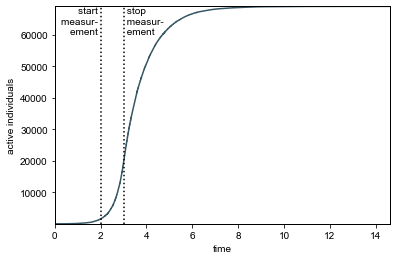

In [30]:
pl.figure()
pl.plot(t, y)
pl.plot([t_start_measuring, t_start_measuring],[0,max(y)],'k:')
pl.plot([t_stop_measuring, t_stop_measuring],[0,max(y)],'k:')
pl.text(t_start_measuring, max(y),
        'start \nmeasur- \nement ',
        ha='right',
        va='top',
       )
pl.text(t_stop_measuring, max(y),
        ' stop\n measur-\n ement',  
        ha='left',
        va='top'
       )
pl.xlim(min(t),max(t))
pl.ylim(min(y),max(y))
pl.xlabel('time')
_ = pl.ylabel('active individuals')


Here we see what we expected. The number of active ("alive") individuals increases exponentially until we stop the experiment at $t_{\mathrm{stop}}$ and let the active individuals reproduce until they become inactive while newborn individuals cannot reproduce anymore (but do not die, either).

The magic happens in the simulation result `counters` though. `counters` is a list of `(int, collections.Counter)` tuples. Each entry of this list belongs to a single individual that was born during the measurement period. The first element of the tuple is the state that this individual was in (or rather, the population that this individual was part of). The second element is a dictionary-like object where `(key, value)` pairs track the total number (`value`) of `key`-offspring. If `key` is not in the dictionary, the respective `key`-offspring count of this individual was zero.

With this simulation result we can compute next generation matrix, eigenstate, and contribution matrix operationally as we defined them at the beginning of this document.

In [31]:
from vaccontrib.sim import (
    get_mean_contribution_matrix_from_simulation, 
    get_mean_eigenstate_from_simulation,
    get_mean_next_generation_matrix_from_simulation,
)

In [32]:
C_sim = get_mean_contribution_matrix_from_simulation(4,counters)
to_jup(C_sim,
       separate_rows=[2],
       separate_columns=[2],
       prefix=r'C_\mathrm{sim}='
      )
to_jup(C_2d,
       separate_rows=[2],
       separate_columns=[2],
       prefix=r'C_\mathrm{theory}='
      )
to_jup(
        convert_2d_block_to_4d_matrix(C_sim,2,2)\
               .sum(axis=0)\
               .sum(axis=0),
       prefix=r'C^{SV}_\mathrm{sim}='
    )
to_jup(
        C_reduced,
        prefix=r'C^{SV}_\mathrm{theory}='
    )

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [33]:
K_sim = get_mean_next_generation_matrix_from_simulation(4,counters)
to_jup(K_sim,
       separate_rows=[2],
       separate_columns=[2],
       prefix=r'K_\mathrm{sim}='
      )
to_jup(K_2d,
       separate_rows=[2],
       separate_columns=[2],
       prefix=r'K_\mathrm{theory}='
      )

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Both $C$ and $K$ obtained from simulation agree well with their theoretical counterparts.

Let's now reduce the infectivity and susceptibility of unvaccinated individuals as in the example above and simulate again. Since, if these contributions are set to zero, the process becomes subcrititcal, we will have to initialize the system in a state where many individuals are active already. Other than that we do everything as before

In [34]:
A, b = convert_4d_next_generation_matrix_and_relative_recovery_rates_for_simulation(K_lockdown_unvacc,relative_recovery_rate)
K_2d_lockdown_unvacc = convert_4d_matrix_to_2d_block(K_lockdown_unvacc)
L = LinearSystem(A, b,
                 initial_conditions=100_000*np.ones(4))
t, y, counters_lockdown_unvacc = L.simulate(1.,2.,verbose=True)

1.0000017435436972 354913 3 139323 len(active_nodes) = 0
2.0000125404276936 333380 3 48609 len(active_nodes) = 7022
3.0000305427086573 362903 3 19333 len(active_nodes) = 1570
4.000419027479752 165177 1 10281 len(active_nodes) = 348
5.000790077799363 90504 0 7346 len(active_nodes) = 80
6.004310683312594 290481 2 6344 len(active_nodes) = 15
7.014022424046683 5295 0 6000 len(active_nodes) = 3


In [35]:
C_lockdown_unvacc_sim = get_mean_contribution_matrix_from_simulation(
    4,
    counters_lockdown_unvacc,
)
to_jup(
        C_lockdown_unvacc_sim,
        separate_rows=[2],
        separate_columns=[2],
        prefix=r'C^*_\mathrm{sim}='
    )
to_jup(
        convert_4d_matrix_to_2d_block(C_lockdown_unvacc),
        separate_rows=[2],
        separate_columns=[2],
        prefix=r'C^*_\mathrm{theory}='
    )
to_jup(
        convert_2d_block_to_4d_matrix(C_lockdown_unvacc_sim,2,2)\
               .sum(axis=0)\
               .sum(axis=0),
        mark_elements=[(1,1)],
        prefix=r'C^{*,SV}_\mathrm{theory}='
    )
to_jup(C_reduced_lockdown_unvacc,fmt='{:6.2f}',mark_elements=[(1,1)],prefix=r'C^{*SV}_\mathrm{theory}=')

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [36]:
y_lockdown_unvacc = vc.main.get_eigenvector(K_lockdown_unvacc)
y_sim = get_mean_eigenstate_from_simulation(4,counters_lockdown_unvacc)
to_jup(y_sim.reshape(2,2),prefix='y_\mathrm{sim}=')
to_jup(y_lockdown_unvacc,prefix='y_\mathrm{theory}=')

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Differences in simulation and theory arise from the fact that the system has not fully approached the eigenstate after $\Delta t=1$ yet.

In [37]:
K_lockdown_unvacc_sim = get_mean_next_generation_matrix_from_simulation(
    4,
    counters_lockdown_unvacc,
)
to_jup(K_lockdown_unvacc_sim,
       separate_rows=[2],
       separate_columns=[2],
       prefix=r'K^*_\mathrm{sim}='
      )
to_jup(convert_4d_matrix_to_2d_block(K_lockdown_unvacc),
       separate_rows=[2],
       separate_columns=[2],
       prefix=r'K^*_\mathrm{theory}='
    )


<IPython.core.display.Math object>

<IPython.core.display.Math object>